In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../data/dataset.csv')

## Persiapan Data 

In [7]:
df

,harga,lb,lt,kt,km,grs
0,3.800000e+09,220,220,3,3,0
1,4.600000e+09,180,137,4,3,2
2,3.000000e+09,267,250,4,4,4
3,4.300000e+08,40,25,2,2,0
4,9.000000e+09,400,355,6,5,3
...,...,...,...,...,...,...
2006,1.600000e+10,488,550,6,5,1
2007,4.500000e+09,209,270,4,4,1
2008,2.900000e+10,692,400,4,3,0
2009,1.700000e+09,102,140,4,3,0


In [4]:
df.head()

,harga,lb,lt,kt,km,grs
0,3.800000e+09,220,220,3,3,0
1,4.600000e+09,180,137,4,3,2
2,3.000000e+09,267,250,4,4,4
3,4.300000e+08,40,25,2,2,0
4,9.000000e+09,400,355,6,5,3


In [5]:
# Cek informasi tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   harga   2011 non-null   float64
 1   lb      2011 non-null   int64  
 2   lt      2011 non-null   int64  
 3   kt      2011 non-null   int64  
 4   km      2011 non-null   int64  
 5   grs     2011 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 94.4 KB


In [3]:
# Mengganti satuan harga agar lebih mudah dibaca 
df['harga'] = (df['harga']/1000000).astype(int)
df.rename(columns={'harga': 'harga(jt)'}, inplace=True)

In [4]:
df

,harga(jt),lb,lt,kt,km,grs
0,3800,220,220,3,3,0
1,4600,180,137,4,3,2
2,3000,267,250,4,4,4
3,430,40,25,2,2,0
4,9000,400,355,6,5,3
...,...,...,...,...,...,...
2006,16000,488,550,6,5,1
2007,4500,209,270,4,4,1
2008,29000,692,400,4,3,0
2009,1700,102,140,4,3,0


## Eksplorasi Data

In [8]:
# Cek null value
df.isna().sum()

harga(jt)    0
lb           0
lt           0
kt           0
km           0
grs          0
dtype: int64

In [9]:
df.describe()

,harga(jt),lb,lt,kt,km,grs
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,12529.818996,402.953754,361.795127,4.563401,3.773247,1.352064
std,16323.249538,415.125367,365.931846,1.803350,1.685850,1.248430
min,430.000000,22.000000,25.000000,1.000000,1.000000,0.000000
25%,4000.000000,173.500000,150.000000,4.000000,3.000000,1.000000
50%,7500.000000,278.000000,298.000000,4.000000,4.000000,1.000000
75%,15500.000000,480.000000,484.500000,5.000000,4.000000,2.000000
max,250000.000000,6790.000000,10000.000000,27.000000,27.000000,10.000000


In [5]:
# Menentukan batas untuk kategori murah, menengah, dan mahal
murah = df['harga(jt)'].quantile(0.25)
mahal = df['harga(jt)'].quantile(0.75)

# Mengelompokkan harga rumah
def kategori(harga):
    if harga <= murah:
        return 'Murah'
    elif harga <= mahal:
        return 'Menengah'
    else:
        return 'Mahal'

df['kategori'] = df['harga(jt)'].apply(kategori)

Jumlah rumah setiap kategori


Menengah    995
Murah       514
Mahal       502
Name: kategori, dtype: int64

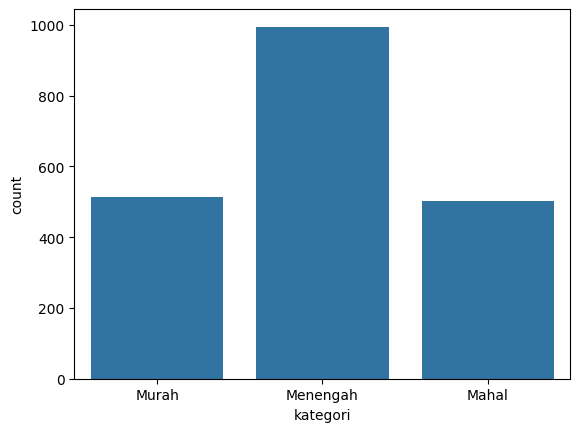

In [6]:
print('Jumlah rumah setiap kategori')
sns.countplot(df, x="kategori")
df['kategori'].value_counts()

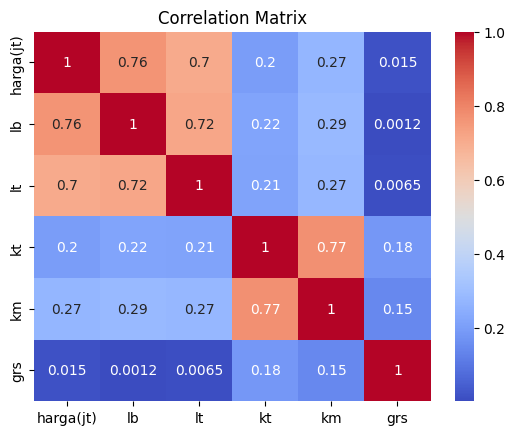

In [12]:
# Mengecek korelasi antar kolom data
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

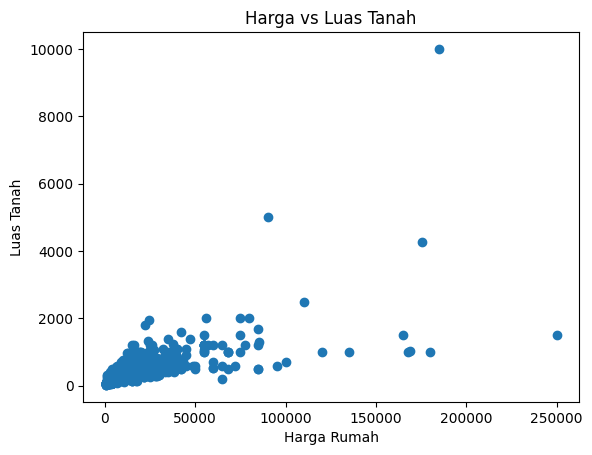

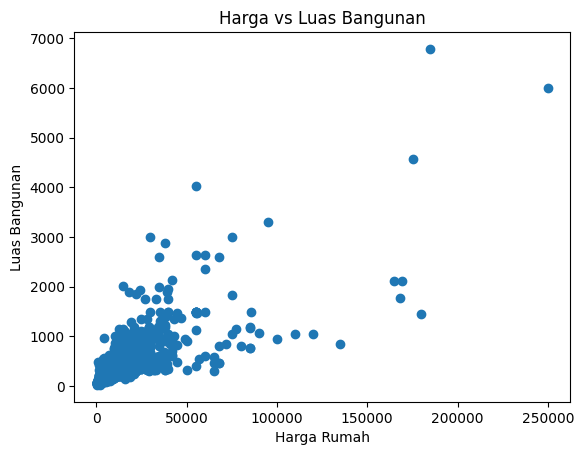

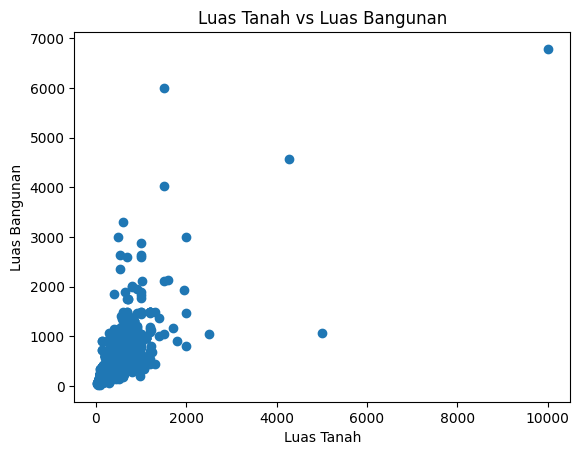

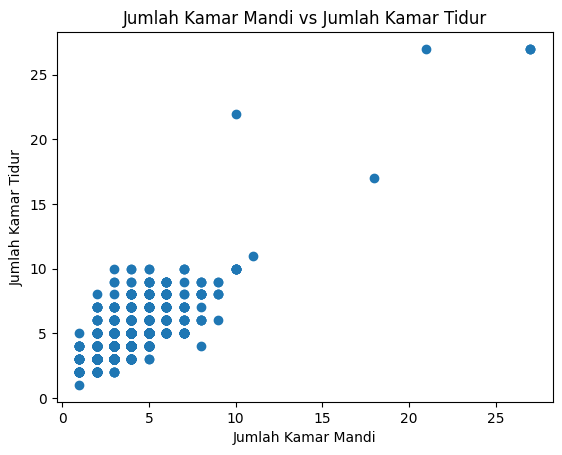

In [13]:
# Membuat scater plot untuk beberapa data 
plt.scatter(df['harga(jt)'], df['lt'])
plt.xlabel('Harga Rumah')
plt.ylabel('Luas Tanah')
plt.title('Harga vs Luas Tanah')
plt.show()

plt.scatter(df['harga(jt)'], df['lb'])
plt.xlabel('Harga Rumah')
plt.ylabel('Luas Bangunan')
plt.title('Harga vs Luas Bangunan')
plt.show()

plt.scatter(df['lt'], df['lb'])
plt.xlabel('Luas Tanah')
plt.ylabel('Luas Bangunan')
plt.title('Luas Tanah vs Luas Bangunan')
plt.show()

plt.scatter(df['km'], df['kt'])
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Jumlah Kamar Tidur')
plt.title('Jumlah Kamar Mandi vs Jumlah Kamar Tidur')
plt.show()

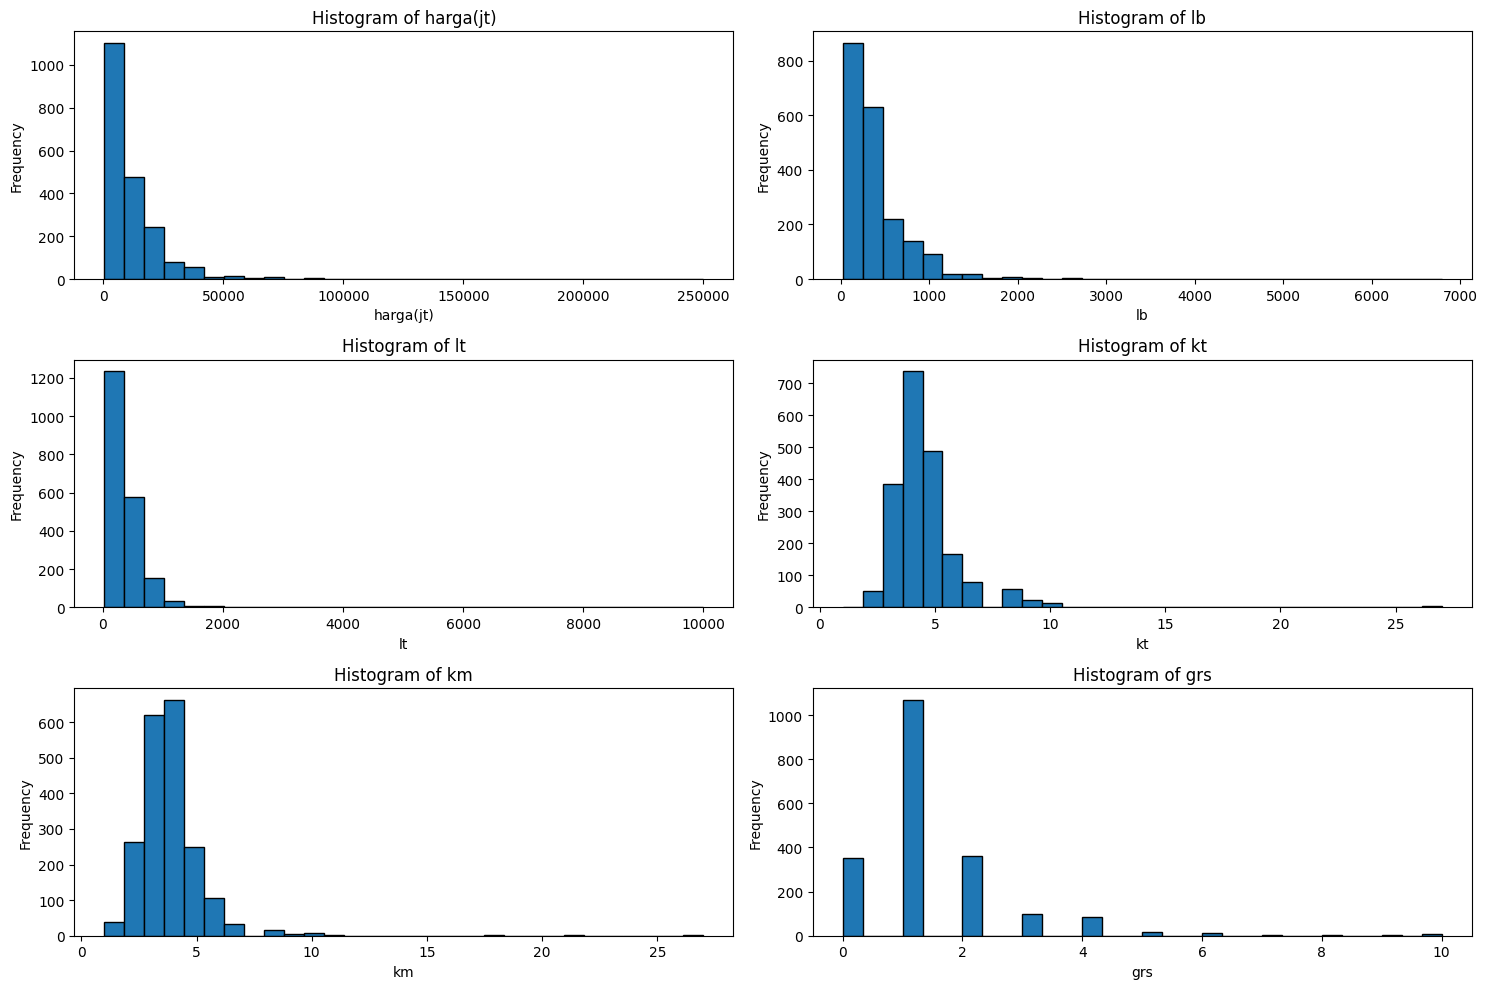

In [14]:
# Membuat histogram
# Daftar kolom yang akan dibuat histogramnya
columns = ['harga(jt)', 'lb', 'lt', 'kt', 'km', 'grs']

# Membuat layout 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Looping untuk setiap kolom dan subplot
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    ax.hist(df[col], bins=30, edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

BOXPLOT AWAL


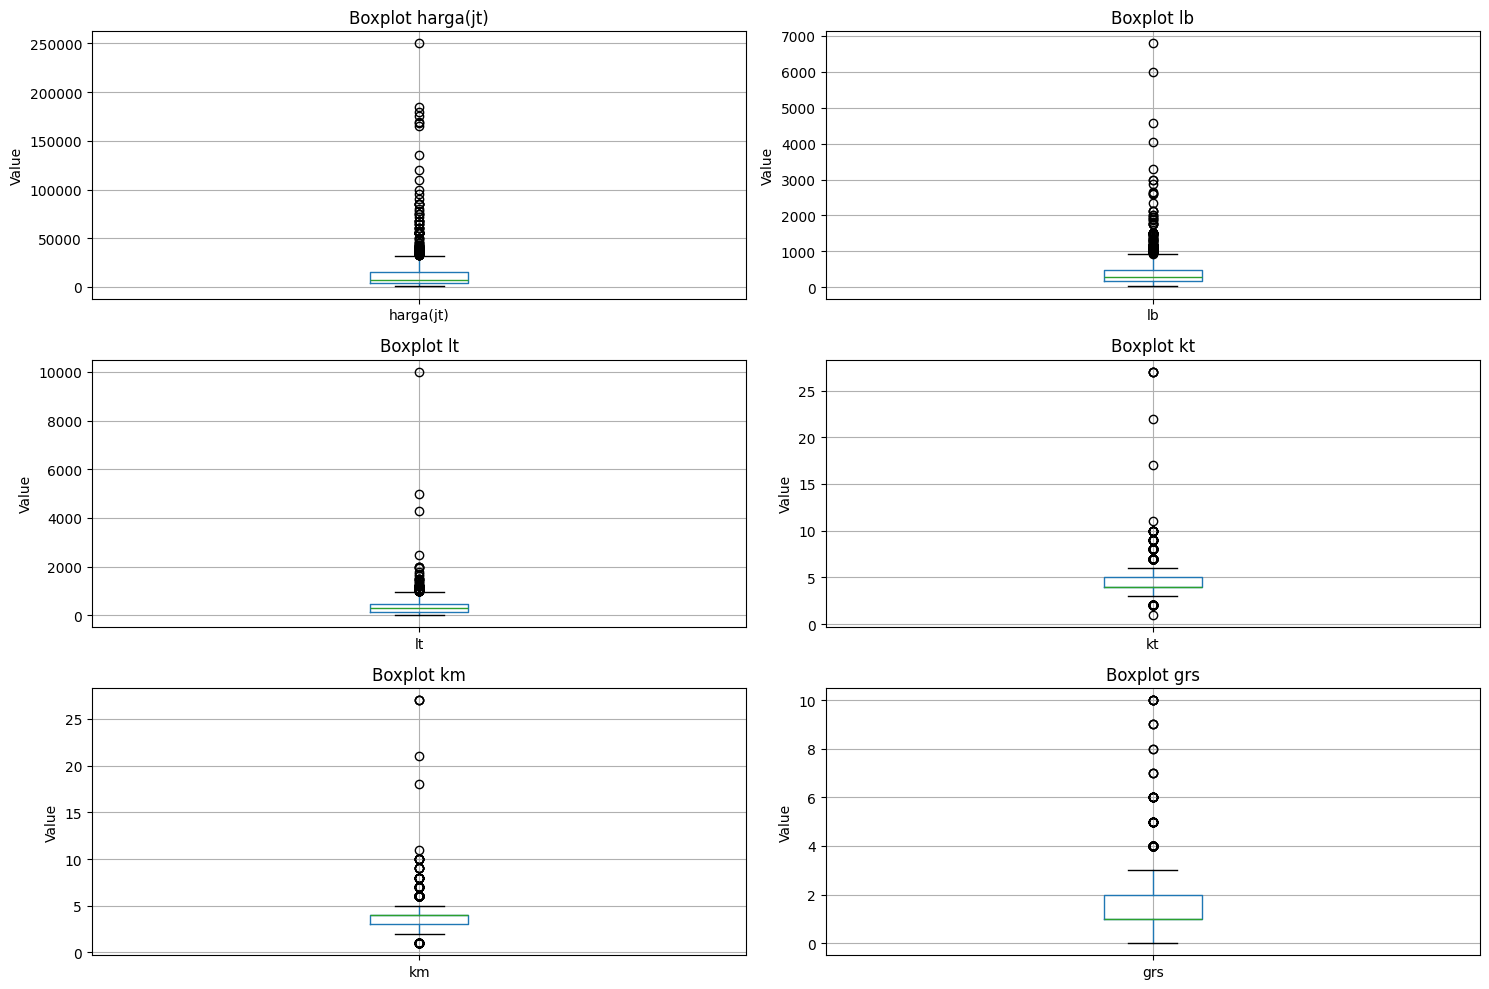

In [15]:
# Membuat boxlot setiap kolom
# Kolom yang akan dibuat boxplot
columns = ['harga(jt)', 'lb', 'lt', 'kt', 'km', 'grs']

# Membuat layout 3x2 untuk boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Looping untuk setiap kolom dan subplot
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'Boxplot {col}')
    ax.set_ylabel('Value')

# Menyesuaikan layout agar tidak overlapping
print("BOXPLOT AWAL")
plt.tight_layout()
plt.show()

## Menghilangkan outlier

### Menggunakan IQR

In [8]:
def remove_outliers(df):
    # Mengiterasi setiap kolom numerik
    for col in df.select_dtypes(include=['number']).columns:
        # Menghitung Q1 (quartile pertama) dan Q3 (quartile ketiga)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Menghitung IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Menentukan batas bawah dan batas atas untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Menghilangkan outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Menghilangkan outlier dari semua kolom numerik
dff = remove_outliers(df)

print("Data sebelum menghilangkan outlier:")
print(df.shape)
print("\nData setelah menghilangkan outlier:")
print(dff.shape)

Data sebelum menghilangkan outlier:
(2011, 7)

Data setelah menghilangkan outlier:
(1413, 7)


BOXPLOT setelah remove outlier


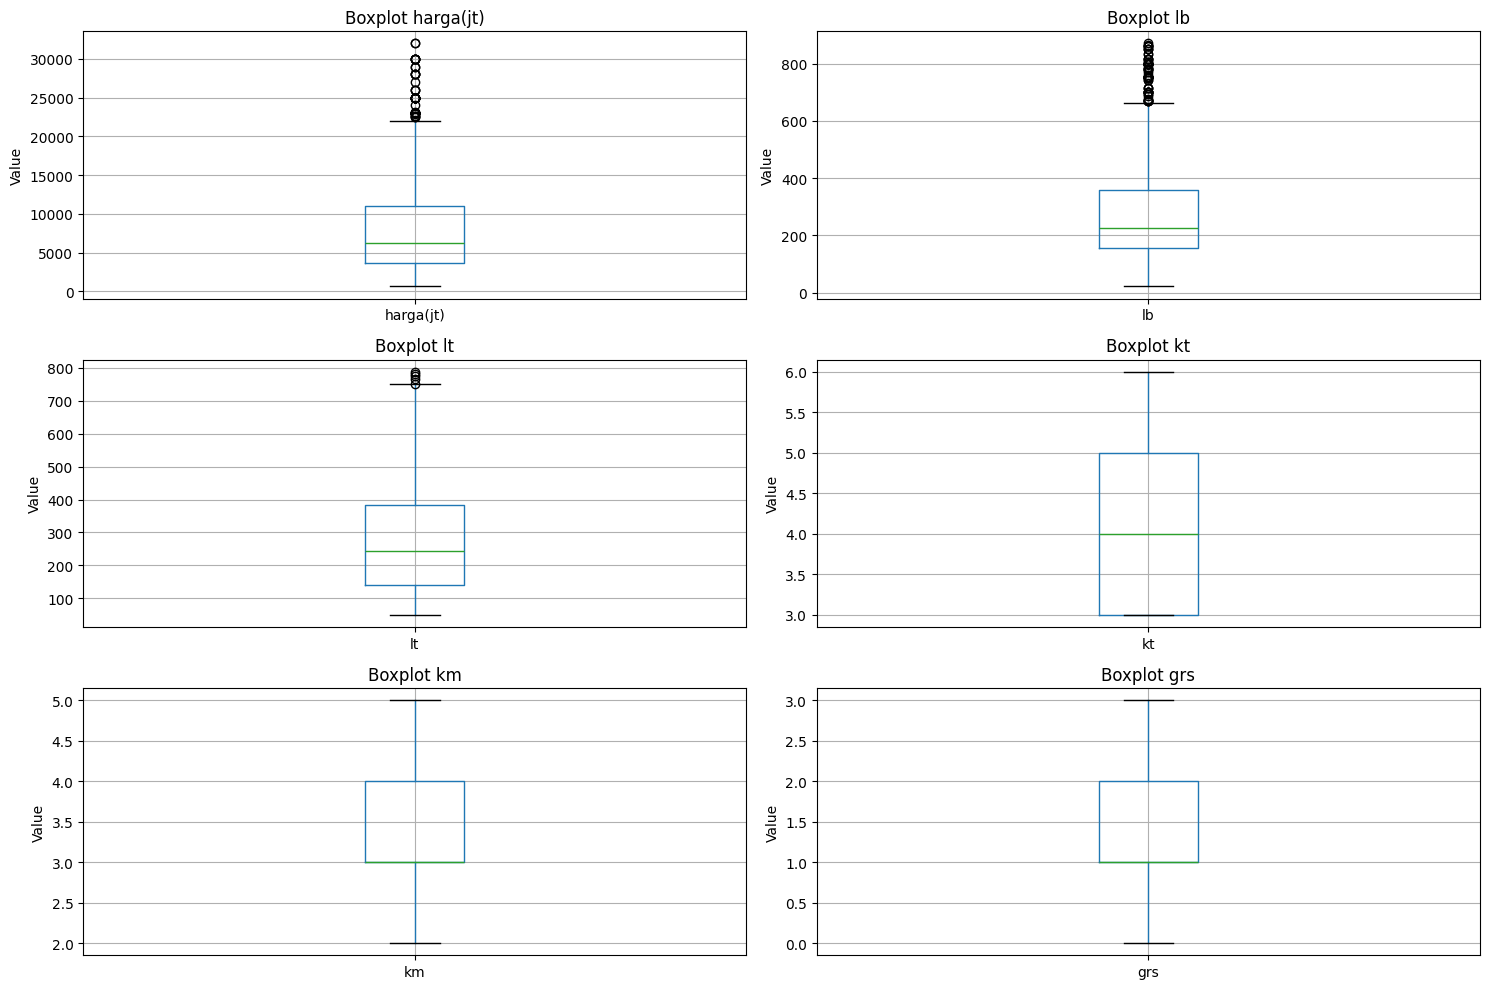

In [17]:
# Kolom yang akan dibuat boxplot
columns = ['harga(jt)', 'lb', 'lt', 'kt', 'km', 'grs']

# Membuat layout 3x2 untuk boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Looping untuk setiap kolom dan subplot
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    dff.boxplot(column=col, ax=ax)
    ax.set_title(f'Boxplot {col}')
    ax.set_ylabel('Value')

# Menyesuaikan layout agar tidak overlapping
print("BOXPLOT setelah remove outlier")
plt.tight_layout()
plt.show()

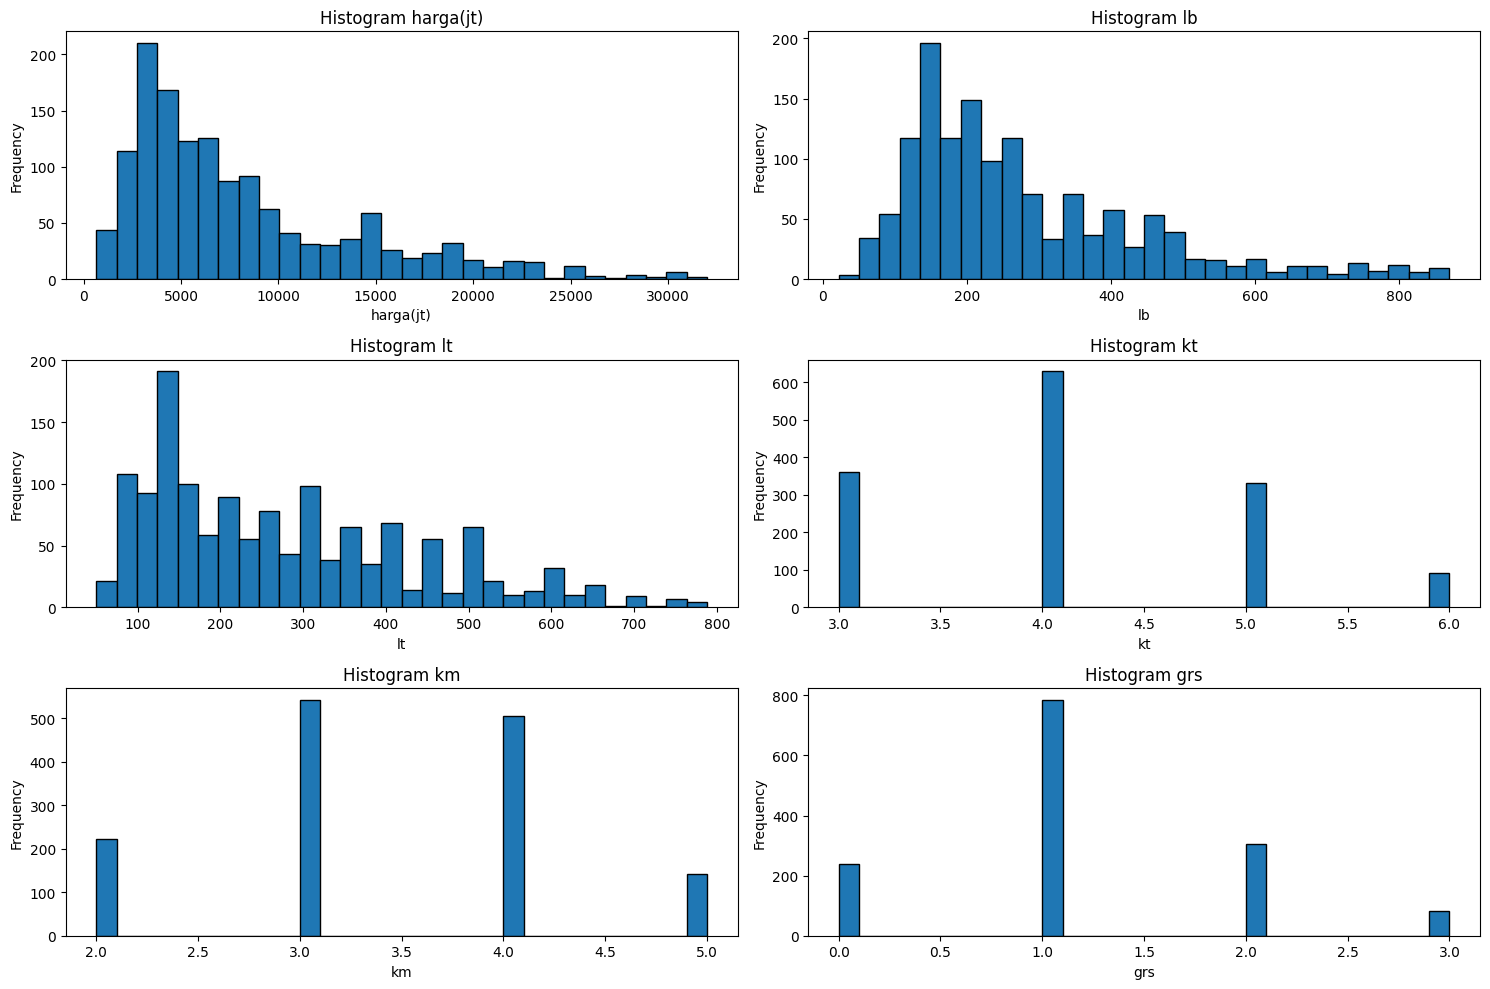

In [18]:
# Daftar kolom yang akan dibuat histogramnya
columns = ['harga(jt)', 'lb', 'lt', 'kt', 'km', 'grs']

# Membuat layout 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Looping untuk setiap kolom dan subplot
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    ax.hist(dff[col], bins=30, edgecolor='black')
    ax.set_title(f'Histogram {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

### Metode Z score

In [19]:
def remove_outliers2(df):
    # Mengiterasi setiap kolom numerik
    for col in df.select_dtypes(include=['number']).columns:
        z_scores = np.abs(stats.zscore(df[col]))
        # Menghilangkan outlier
        df = df[z_scores < 3]
    
    return df

# Menghilangkan outlier dari semua kolom numerik
dfz = remove_outliers2(df)

print("Data sebelum menghilangkan outlier:")
print(df.shape)
print("\nData setelah menghilangkan outlier:")
print(dfz.shape)

Data sebelum menghilangkan outlier:
(2011, 7)

Data setelah menghilangkan outlier:
(1863, 7)


BOXPLOT setelah remove outlier


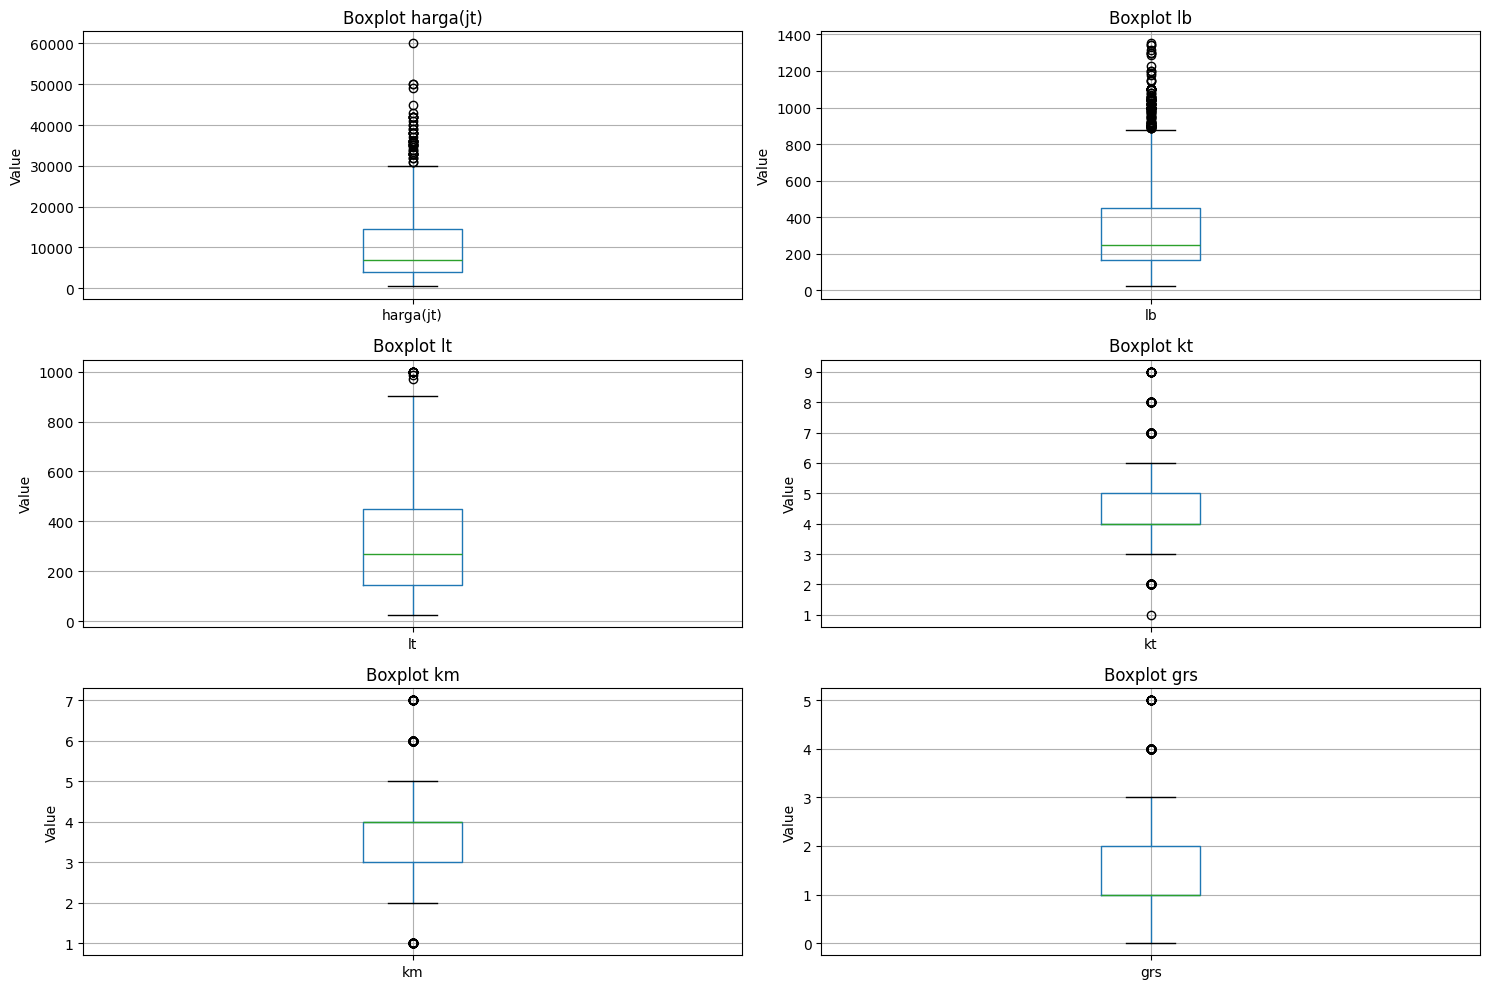

In [20]:
# Kolom yang akan dibuat boxplot
columns = ['harga(jt)', 'lb', 'lt', 'kt', 'km', 'grs']

# Membuat layout 3x2 untuk boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Looping untuk setiap kolom dan subplot
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    dfz.boxplot(column=col, ax=ax)
    ax.set_title(f'Boxplot {col}')
    ax.set_ylabel('Value')

# Menyesuaikan layout agar tidak overlapping
print("BOXPLOT setelah remove outlier")
plt.tight_layout()
plt.show()

### Metode threshold manual

Ukuran data lama (2011, 7)
Ukuran data baru (1886, 7)


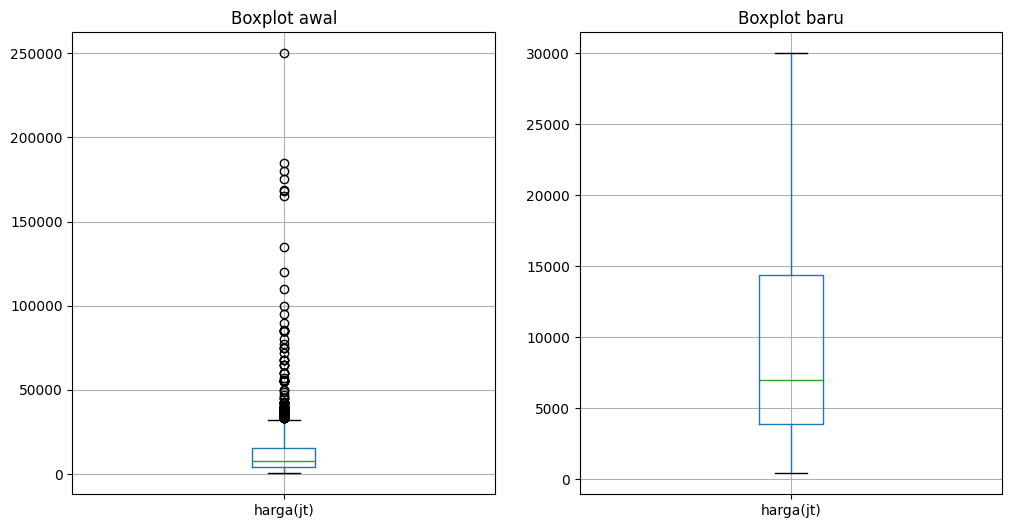

In [21]:
# Mencoba remove outlier untuk satu kolom
def removal_box_plot(df, column, threshold):
    print('Ukuran data lama',df.shape)
    removed_outliers = df[df[column] <= threshold]
    print('Ukuran data baru',removed_outliers.shape)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    df.boxplot(column=column, ax=axes[0])
    axes[0].set_title('Boxplot awal')
    removed_outliers.boxplot(column=column, ax=axes[1])
    axes[1].set_title('Boxplot baru')
    return removed_outliers
  
threshold_value = 30000
no_outliers = removal_box_plot(df, 'harga(jt)', threshold_value)

Ukuran data awal (2011, 7)
Ukuran data baru (1760, 7)


Text(0.5, 1.0, 'Boxplot lama')

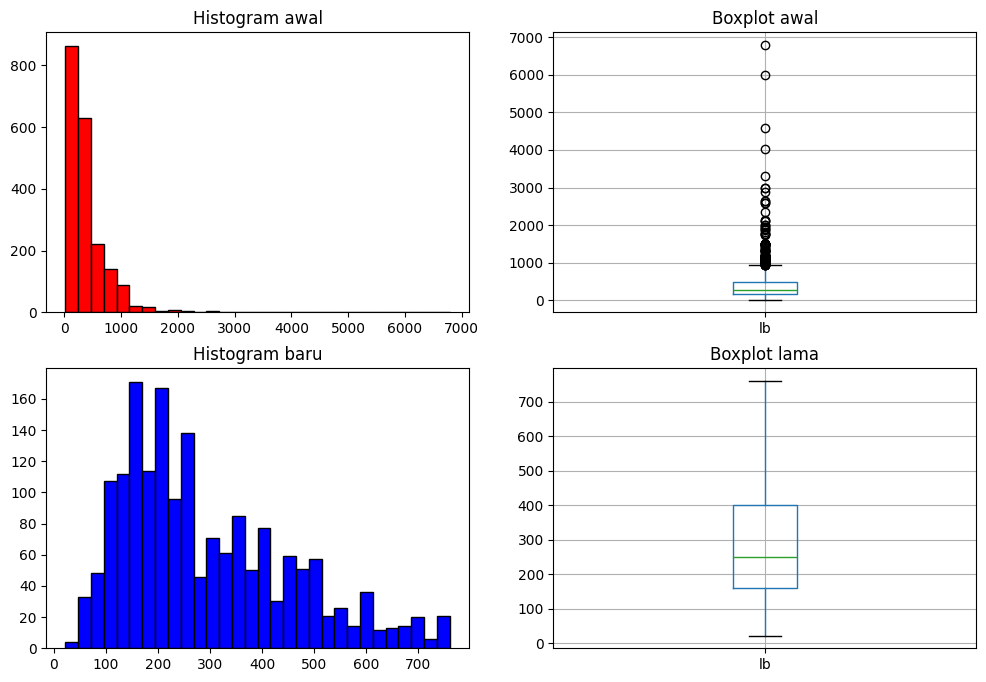

In [22]:
# Mencoba melihat perbedaan setelah menghilangkan outlier
dz = df.copy()
dz = df[df['lb'] <= 760]

# Membuat subplots dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Baris pertama: Histogram
print("Ukuran data awal",df.shape)
axes[0][0].hist(df['lb'], bins=30, color='red', edgecolor='black')
axes[0][0].set_title('Histogram awal')
df.boxplot(column='lb', ax=axes[0][1])
axes[0][1].set_title('Boxplot awal')

# Baris kedua: Boxplot
print("Ukuran data baru",dz.shape)
axes[1][0].hist(dz['lb'], bins=30, color='blue', edgecolor='black')
axes[1][0].set_title('Histogram baru')
dz.boxplot(column='lb', ax=axes[1][1])
axes[1][1].set_title('Boxplot lama')


## Standarisasi data

In [9]:
# Menggunakan data yang sudah dibuang outlier 
X = dff[['lb','lt','kt','km','grs']].values #Fitur
y = dff['harga(jt)'].values #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [10]:
from sklearn.preprocessing import StandardScaler 
# define standard scaler 
scaler = StandardScaler() 
  
# transform data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modelling

In [11]:
# Menggunakan data tanpa standarisasi
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Menggunakan data standarisasi
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
import pickle
# Simpan model dengan pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [16]:
# Evaluasi model data tanpa standarisasi
y_pred = model.predict(X_test)

# Metrik Evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Persentase error rata-rata
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 1860.2019398911805
Root Mean Squared Error (RMSE): 2711.0033170063157
Mean Absolute Percentage Error (MAPE): 25.32021896927227 %
R^2 Score: 0.7704927512930907


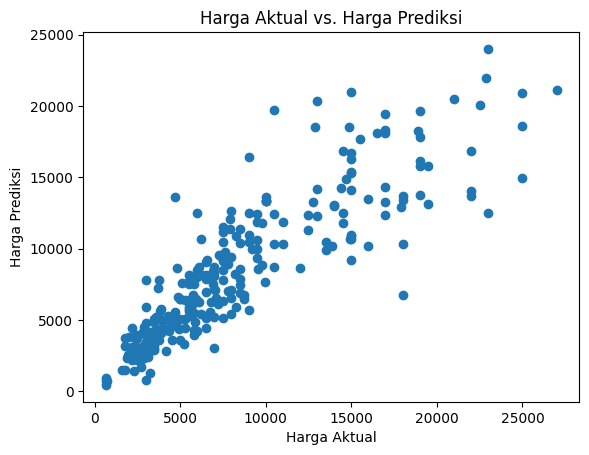

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Harga Aktual vs. Harga Prediksi')
plt.show()

In [37]:
# Evaluasi model data standarisasi
y_pred = model.predict(X_test_scaled)

# Metrik Evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Persentase error rata-rata
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 8991.383294301835
Root Mean Squared Error (RMSE): 10607.302638023306
Mean Absolute Percentage Error (MAPE): 119.92531463027731 %
R^2 Score: -2.513550732172852


In [38]:
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Koefisien: [  13.92902422   19.55279176 -341.40568793  267.27725028  308.70952098]
Intercept: -926.2972617181676


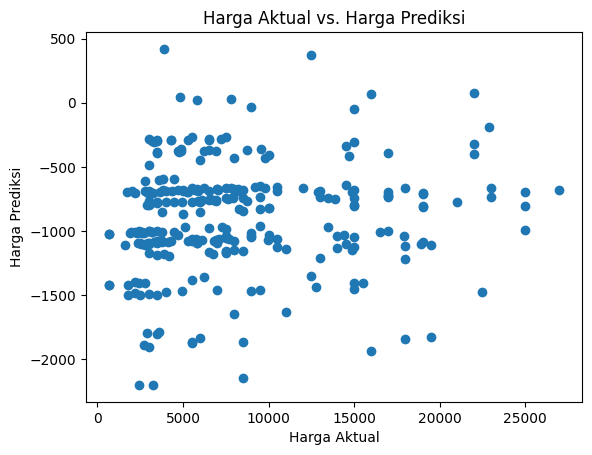

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Harga Aktual vs. Harga Prediksi')
plt.show()